In [1]:
import pandas
import pandas as pd
import fasttext
from huggingface_hub import hf_hub_download
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 18,

    # Axes
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 2.0,
    'lines.markersize': 2,
    'axes.labelsize': 10,
    'axes.titlesize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
})

In [4]:
ruta = "/export/usuarios_ml4ds/lbartolome/NextProcurement/data/processed_19_abr/trf_lote.parquet"

In [5]:
fasttext.FastText.eprint = lambda x: None
model_path = hf_hub_download(repo_id="facebook/fasttext-language-identification", filename="model.bin")
model = fasttext.load_model(model_path)

def langDetectHF (row):
    try:
        lang = model.predict (row.raw_text.replace("\n", ""))[0][0].replace('__label__','')
    except Exception as E:
        #import ipdb ; ipdb.set_trace()
        lang =str(E)
    return lang

In [6]:
df = pd.read_parquet(ruta)

In [7]:
df["lang"] = df.apply(langDetectHF,axis=1)

In [8]:
df

,id_tm,raw_text,lemmas,lang
identifier,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,Redacción EPIA - Legalización antena emisora d...,epia legalización antena emisora_radio narcea,glg_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,spa_Latn
...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,spa_Latn
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,spa_Latn
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,spa_Latn


In [9]:
filtered_df = df[df['lang'].isin(["cat_Latn", "eus_Latn", "spa_Latn", "glg_Latn"])]
filtered_df

,id_tm,raw_text,lemmas,lang
identifier,,,,
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/499,0,Reforma de elementos de ventilación exterior d...,reforma elemento ventilación exterior aire_aco...,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/498,1,Servicios de calibrado y certificado de dos de...,calibrado certificado detector portátil gas tr...,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/497,2,"Patrocinio menor proyecto "" Activitats C.I.N.E""",patrocinio activitats,spa_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/496,3,Redacción EPIA - Legalización antena emisora d...,epia legalización antena emisora_radio narcea,glg_Latn
contratosMenoresPerfilesContratantes_2018.zip/contratosMenoresPerfilesContratantes_20190225_140722_12.atom/495,4,Obras de reparación del Centro de Información ...,centro información naturaleza rellano,spa_Latn
...,...,...,...,...
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/4,3110256,concesion de servicios de peluquerías en 10 cp...,concesion cpas dependiente dt,spa_Latn
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/3,3110257,Servicios y suministros para la seguridad inte...,integral veiasa,spa_Latn
PlataformasAgregadasSinMenores_202401.zip/PlataformasAgregadasSinMenores.atom/2,3110258,Contrato de concesión de servicios para la ges...,concesión integral cfa,spa_Latn


In [14]:
excluded_langs = ["cat_Latn", "eus_Latn", "spa_Latn", "glg_Latn"]

# Replace values not in the list with "others" in the "lang" column
df['lang'] = df['lang'].apply(lambda x: 'others' if x not in excluded_langs else x)
df.lang.unique()

array(['spa_Latn', 'glg_Latn', 'others', 'cat_Latn', 'eus_Latn'],
      dtype=object)

In [20]:
grouped_data = df.groupby('lang').size().sort_values(ascending=False)
grouped_data

lang
spa_Latn    2606158
cat_Latn     219116
others       182705
glg_Latn      98876
eus_Latn       3406
dtype: int64

In [21]:
grouped_data.index

Index(['spa_Latn', 'cat_Latn', 'others', 'glg_Latn', 'eus_Latn'], dtype='object', name='lang')

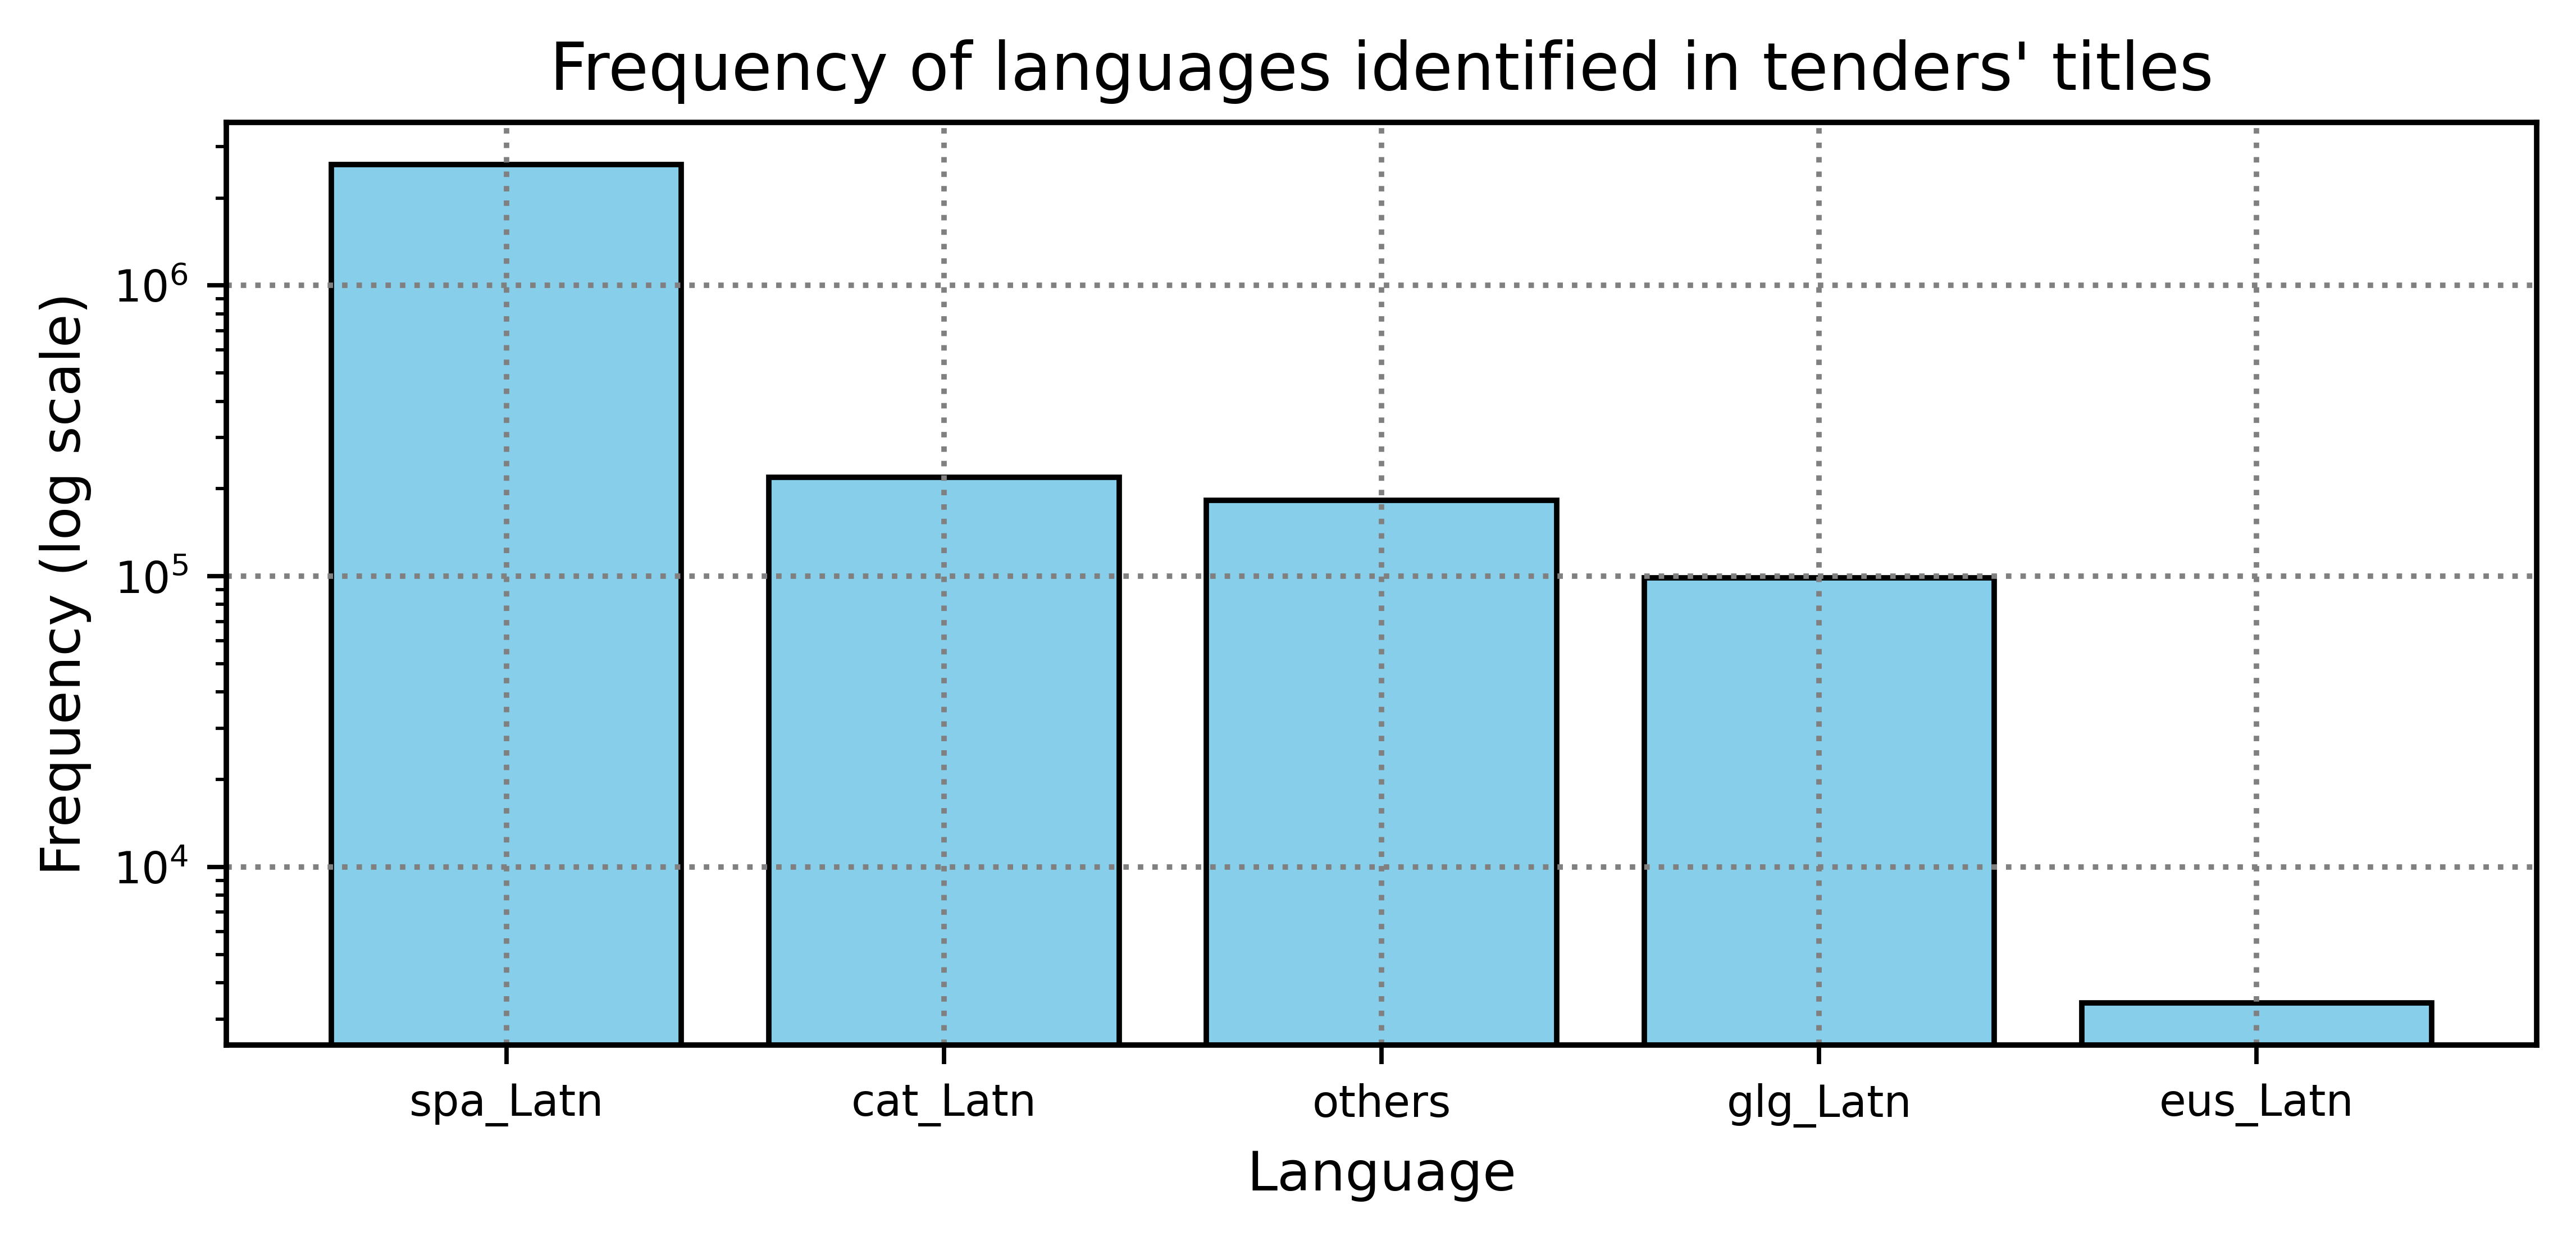

In [31]:
plt.figure()  # Set the figure size (width, height)
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', edgecolor='black')

plt.yscale('log')  # Set the y-axis scale to logarithmic

plt.xlabel('Language')
plt.ylabel('Frequency (log scale)')
plt.title("Frequency of languages identified in tenders' titles")

#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.savefig('foo_lang.png', bbox_inches='tight')
plt.show()